# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [23]:
from palmerpenguins import load_penguins
import pandas as pd
from plotnine import ggplot, aes, geom_point, geom_line, labs, theme_minimal
from sklearn.linear_model import LinearRegression

df = load_penguins()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


We would *need* to dummify:

        - species
        - island
        - sex

In [24]:
# Create dummy variables for categorical columns
df_dummified = pd.get_dummies(df, columns=['species', 'island', 'sex'], dtype = float)

# Display the first few rows of the transformed dataset
df_dummified.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,2007,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,39.5,17.4,186.0,3800.0,2007,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,40.3,18.0,195.0,3250.0,2007,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,NaN,NaN,NaN,NaN,2007,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,36.7,19.3,193.0,3450.0,2007,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [25]:
def add_polynomial_features(df, column, max_degree):
    for degree in range(2, max_degree + 1):
        df[f'{column}_degree_{degree}'] = df[column] ** degree

add_polynomial_features(df, 'bill_length_mm', 10)

# Display the first few rows to check the added polynomial columns
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_length_mm_degree_2,bill_length_mm_degree_3,bill_length_mm_degree_4,bill_length_mm_degree_5,bill_length_mm_degree_6,bill_length_mm_degree_7,bill_length_mm_degree_8,bill_length_mm_degree_9,bill_length_mm_degree_10
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1528.81,59776.471,2.337260e+06,9.138687e+07,3.573226e+09,1.397132e+11,5.462784e+12,2.135949e+14,8.351559e+15
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,1560.25,61629.875,2.434380e+06,9.615801e+07,3.798241e+09,1.500305e+11,5.926206e+12,2.340851e+14,9.246363e+15
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,1624.09,65450.827,2.637668e+06,1.062980e+08,4.283811e+09,1.726376e+11,6.957294e+12,2.803790e+14,1.129927e+16
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,1346.89,49430.863,1.814113e+06,6.657794e+07,2.443410e+09,8.967315e+10,3.291005e+12,1.207799e+14,4.432621e+15


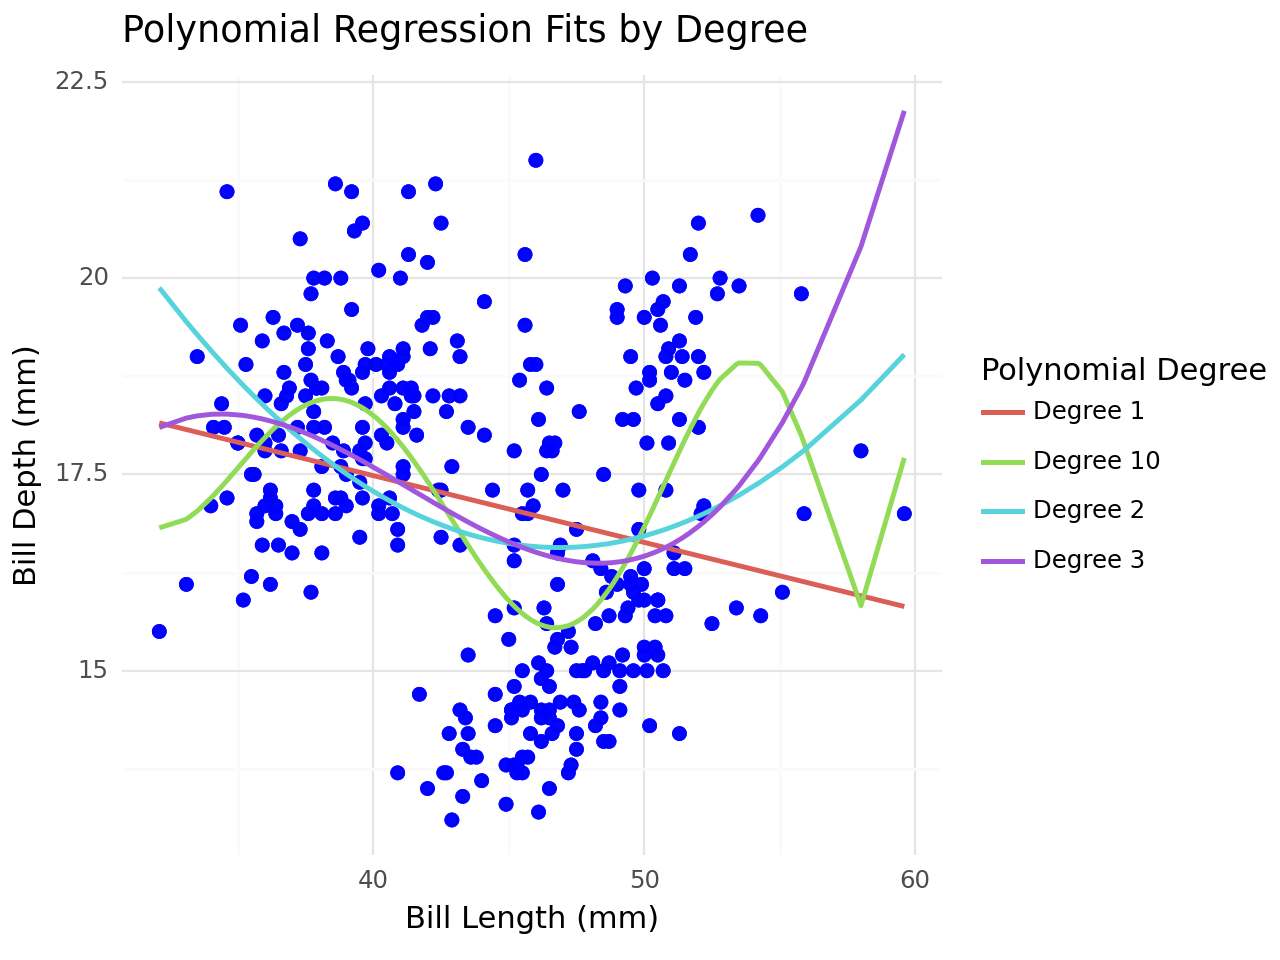

<Figure Size: (640 x 480)>

In [26]:
# Drop rows with NaN values in bill_length_mm or bill_depth_mm
df = df.dropna(subset=['bill_length_mm', 'bill_depth_mm']).copy()

# Set target variable
y = df['bill_depth_mm'].values

# Fit each model and store predictions in the DataFrame
# Degree 1
X_deg1 = df[['bill_length_mm']]
model_deg1 = LinearRegression().fit(X_deg1, y)
df['Degree 1'] = model_deg1.predict(X_deg1)

# Degree 2
X_deg2 = df[['bill_length_mm', 'bill_length_mm_degree_2']]
model_deg2 = LinearRegression().fit(X_deg2, y)
df['Degree 2'] = model_deg2.predict(X_deg2)

# Degree 3
X_deg3 = df[['bill_length_mm', 'bill_length_mm_degree_2', 'bill_length_mm_degree_3']]
model_deg3 = LinearRegression().fit(X_deg3, y)
df['Degree 3'] = model_deg3.predict(X_deg3)

# Degree 10
X_deg10 = df[['bill_length_mm'] + [f'bill_length_mm_degree_{i}' for i in range(2, 11)]]
model_deg10 = LinearRegression().fit(X_deg10, y)
df['Degree 10'] = model_deg10.predict(X_deg10)

# For easier plotting with labels
df_long = df.melt(id_vars=['bill_length_mm', 'bill_depth_mm'],
                  value_vars=['Degree 1', 'Degree 2', 'Degree 3', 'Degree 10'],
                  var_name='Model', value_name='Prediction')

(
        ggplot(df_long, aes(x='bill_length_mm', y='bill_depth_mm')) +
        geom_point(color='blue', size=2, alpha=0.6) +
        geom_line(aes(y='Prediction', color='Model'), size=1) +
        labs(title='Polynomial Regression Fits by Degree',
             x='Bill Length (mm)',
             y='Bill Depth (mm)',
             color='Polynomial Degree') +
        theme_minimal()
)

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

The Degree 1 (Linear) model is underfitting the data because it’s too simplistic, using a straight line that doesn’t capture the nonlinear pattern present in the scatterplot. The Degree 10 model, on the other hand, is overfitting as it shows excessive waviness, closely following minor fluctuations in the data rather than the overall trend. The Degree 2 and Degree 3 models likely provide the best fit, as they effectively capture the general curvature and structure of the data without the excessive complexity seen in the Degree 10 model, balancing flexibility with generalization.